In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
y_all= np.loadtxt('linemeas.txt')
print(y_all.shape)
y_all[:10]

(512,)


array([ 195.40012,  185.72068,  196.16014,  195.35386,  217.44663,
        207.80411,  201.25959,  197.77452,  201.69585,  208.66447])

You can do anything in numpy that you would have done in Matlab.  One small caution:  make sure your arrays are of type Matrix instead of numpy arrays so that the multiplication operator * acts like a matrix multiply rather than an element-by-element multiply.  The default * operator for numpy arrays is equivalent to the Matlab .* element by element multiply.  

In [20]:
# no control term B*u
def kalman_update(x, P, y, R, G, Q, A, C):
    '''
    Parameters:
    x: initial state
    P: initial uncertainty convariance matrix
    y: observed position measurement (same shape as C*x)
    R: measurement noise convariance matrix(same shape as C)
    Q: motion noise convariance matrix 
    A: next state function: x_prime = A*x+G*w
    C: measurement function: y = C*x+v

    Return: the updated new values for (x, P)
    '''
    # UPDATE x, P; x(t|t), P(t|t) based on measurement y   and x(t|t-1), P(t|t-1)
    S = C * P * C.T + R  # residual convariance
    K = P * C.T * S.I    # Kalman gain
    x = x + K*(y.T - C * x)#np.matrix(y)
    P = P - K*C*P
#     I = np.matrix(np.eye(A.shape[0])) # identity matrix
#     P = (I - K*C)*P

    return x, P

def kalman_predict(x, P, y, R, G, Q, A, C):
    '''
    Return: the  predicted new values for (x, P)
    '''
    # PREDICT x(t+1|t), P(t+1|t) based after updated value x(t|t), P(t|t)
    x = A*x 
    P = A*P*A.T + G*Q*G.T

    return x, P

In [16]:
# np.matrix(np.eye(4))
# np.zeros((2, 4))

# np.matrix(y)#matrix([[-18.338,  -7.838]])
# np.diag([ sigma_b2,  sigma_a2, sigma_b2])
# np.matrix(np.diag([ q,  0, 0])) #
# np.matrix([[ 1.,  0.,  0.]])

In [53]:
sigma_b2=10000
sigma_a2=16
q=0.04
r=100

x = np.matrix([ 256,  0., 256]).T#np.matrix(np.zeros((4, 1)))
print(x.shape)
# P = np.matrix(np.diag([ sigma_b2,  sigma_a2, sigma_b2])) # initial uncertainty! not independent!!
P = np.matrix([[ sigma_b2,  0.,  sigma_b2],
            [ 0.,  sigma_a2,  0.],
            [ sigma_b2,  0.,  sigma_b2]])
Q = np.matrix(np.diag([ q,  0, 0])) #0.09*np.matrix(np.eye(2))
R = r  
G= np.matrix(np.eye(3))
A=np.matrix([[ 1.,  1.,  0.],
            [ 0.,  1.,  0.],
            [ 0.,  0.,  1.]])
C=np.matrix([[ 1.,  0.,  0.]])
print(C.shape)

(3, 1)
(1, 3)


In [54]:
result_update = []
result_predict = []    
for y in y_all:
    y=np.matrix(y)# row matrix
    x, P = kalman_update(x, P, y, R, G, Q, A, C)
    result_update.append((x).tolist())#x[[1,2]]
    x, P = kalman_predict(x, P, y, R, G, Q, A, C)    
    result_predict.append((x).tolist())

kalman_u1, kalman_u2, kalman_u3 = zip(*result_update)
kalman_p1, kalman_p2, kalman_p3 = zip(*result_predict)

The input file ”linemeas.txt” in the assignment directory contains
a vector of 512 mesurements. Process all 512 measurements through the Kalman filter to get the best
estimate of the coefficients a, b from the image data. Report the estimates.

# 2 (c)

## predicted and updated estimate of the coefficients a from the image data through the Kalman filter 

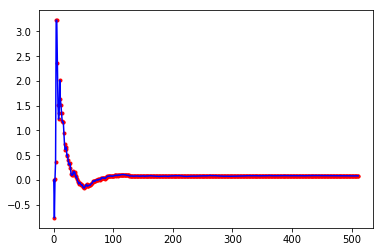

In [55]:
# red line is updated estimate and blue is predicted estimate
plt.plot(range(len(kalman_u2)), kalman_u2, 'r.')
plt.plot(range(len(kalman_p2)), kalman_p2, 'b-')
plt.show()

## predicted and updated estimate of the coefficients   b from the image data through the Kalman filter 

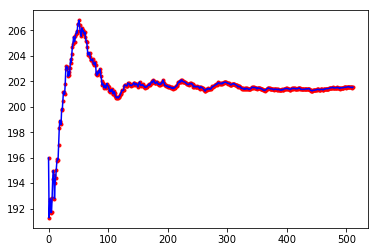

In [56]:
# red line is updated estimate and blue is predicted estimate
plt.plot(range(len(kalman_u3)), kalman_u3, 'r.')
plt.plot(range(len(kalman_p3)), kalman_p3, 'b-')
plt.show()

# 2 (d)

Use the outputs of the Kalman filter to estimate the variances of the estimates of a, b at the final time
generated after processing all 512 measurements. Report the individual variances of a, b and their cross-
covariance. Note that the final estimate of a, b correspond to a fixed-point smoother estimate of these
parameters using all the data.

In [57]:
P

matrix([[  2.26767791e+00,   4.90263675e-03,  -2.42484366e-01],
        [  4.90263675e-03,   9.70839754e-05,  -4.80460135e-03],
        [ -2.42484366e-01,  -4.80460135e-03,   2.21748353e+00]])

In [59]:
print(' variances of a is ' +str(P[1,1]) +', variances of b is ' +str(P[2,2]) +', and their cross-covariance is ' +str(P[2,1]) )

 variances of a is 9.70839753641e-05, variances of b is 2.21748353477, and their cross-covariance is -0.00480460134661


Reference: shared code
 https://stackoverflow.com/questions/13901997/kalman-2d-filter-in-python